# Modeling and Simulation in Python

Chapter 10

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

### Under the hood

To get a `DataFrame` and a `Series`, I'll read the world population data and select a column.

`DataFrame` and `Series` contain a variable called `shape` that indicates the number of rows and columns.

In [2]:
filename = 'ModSimPy/notebooks/data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
table2.shape

(67, 11)

In [3]:
census = table2.census / 1e9
census.shape

(67,)

In [4]:
un = table2.un / 1e9
un.shape

(67,)

A `DataFrame` contains `index`, which labels the rows.  It is an `Int64Index`, which is similar to a NumPy array.

In [5]:
table2.index

Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', name='Year')

And `columns`, which labels the columns.

In [6]:
table2.columns

Index(['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj',
       'thomlinson', 'durand', 'clark'],
      dtype='object')

And `values`, which is an array of values.

In [7]:
table2.values

array([[2557628654, 2516000000.0, 2525149000.0, 2544000000.0,
        2527960000.0, 2400000000.0, 2527000000.0, 2500000000.0,
        2400000000.0, nan, 2486000000.0],
       [2594939877, nan, 2572850917.0, 2571663000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2636772306, nan, 2619292068.0, 2617949000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2682053389, nan, 2665865392.0, 2665959000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2730228104, nan, 2713172027.0, 2716927000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2782098943, nan, 2761650981.0, 2769074000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2835299673, nan, 2811572031.0, 2822502000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2891349717, nan, 2863042795.0, 2879934000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2948137248, nan, 2916030167.0, 2939254000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [3000716593, nan, 2970395814.0, 2995909000.0, nan

A `Series` does not have `columns`, but it does have `name`.

In [8]:
census.name

'census'

It contains `values`, which is an array.

In [9]:
census.values

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.85858475, 6.93599949, 7.01387131, 7.09212809, 7.16996819,
       7.24789279, 7.32599671])

And it contains `index`:

In [10]:
census.index

Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype='int64', name='Year')

If you ever wonder what kind of object a variable refers to, you can use the `type` function.  The result indicates what type the object is, and the module where that type is defined.

`DataFrame`, `Int64Index`, `Index`, and `Series` are defined by Pandas.

`ndarray` is defined by NumPy.

In [11]:
type(table2)

pandas.core.frame.DataFrame

In [12]:
type(table2.index)

pandas.core.indexes.base.Index

In [13]:
type(table2.columns)

pandas.core.indexes.base.Index

In [14]:
type(table2.values)

numpy.ndarray

In [15]:
type(census)

pandas.core.series.Series

In [16]:
type(census.index)

pandas.core.indexes.base.Index

In [17]:
type(census.values)

numpy.ndarray

## Optional exercise

The following exercise provides a chance to practice what you have learned so far, and maybe develop a different growth model.  If you feel comfortable with what we have done so far, you might want to give it a try.

**Optional Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

In [18]:
filename = 'ModSimPy/notebooks/data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

Select `tables[1]`, which is the second table on the page.

In [19]:
table1 = tables[1]
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

Again, we'll replace the long column names with more convenient abbreviations.

Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [20]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

In [21]:
table1.head()

,PRB,UN,Maddison,HYDE,Tanton,Biraben,McEvedy & Jones,Thomlinson,Durand,Clark
Year,,,,,,,,,,
-10000,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
-9000,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
-8000,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
-7000,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
-6000,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
table1.tail()

,PRB,UN,Maddison,HYDE,Tanton,Biraben,McEvedy & Jones,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1913,NaN,NaN,1793.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.0,1912.0,NaN,NaN,NaN,NaN,NaN,1968.0
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.0,NaN,NaN,NaN,NaN,NaN,2145.0
1940,NaN,2300.0,2299.0,2307.0,NaN,NaN,NaN,NaN,NaN,2340.0


Here are the results.  Notice that we are working in millions now, not billions.

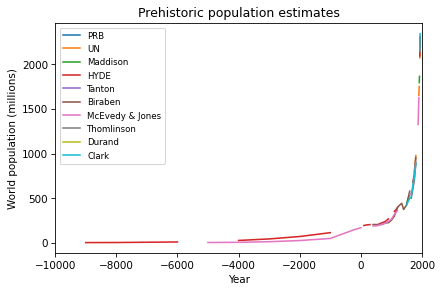

In [23]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small');

We can use `xlim` to zoom in on everything after Year 0.

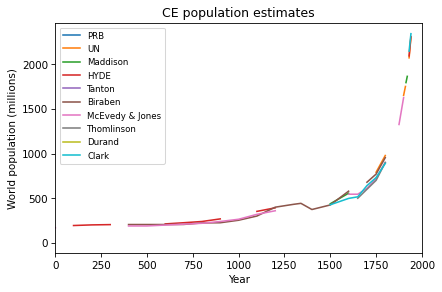

In [24]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates')
plt.legend(fontsize='small');

See if you can find a model that fits these data well from Year 0 to 1950.



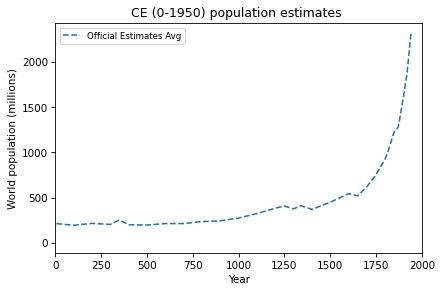

In [25]:
# Solution goes here
# Plot AVG data from from 0-1950 to explore the trends

plt.plot(table1.mean(axis=1), '--', label='Official Estimates Avg')
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE (0-1950) population estimates ')
plt.legend(fontsize='small')


In [26]:
# Helper functions
def get_last_label(series):
    return series.index[-1]

def get_last_value(series):
    return series.iloc[-1]

def plot_results(avg_pop, timeseries, title):
    plt.plot(avg_pop, '--', label='Official Estimates Avg')
    plt.plot(timeseries, color='gray', label='model')
    decorate(xlim=[0, 2200], xlabel='Year', ylabel='World population (millions', title=title)


# Generalized function to run simulations with different update functions
def run_simulation(system, update_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    for t in linrange(system.t_0, system.t_end):
        results[t + 1] = update_func(results[t], t, system)
    return results

# Exponetial Growth Model 
def update_func_exp(avg_pop, t, system):
    if t < 1100:
        net_growth = system.r1 * avg_pop
    elif t < 1750:
        net_growth = system.r2 * avg_pop
    else:
        net_growth = system.r3 * avg_pop

    return avg_pop + net_growth

# Projections plot
def projection_plot(avg_pop_b, timeseries, census, title):
    plt.plot(avg_pop_b.loc[1920:], '--', label='Official Estimates Avg')
    plt.plot(timeseries[1900:], color='gray', label='model')
    plt.plot(census, ':', label='US Census')
    decorate(xlabel='Year', ylabel='World population (billions', title=title)



215.0
2311.5
System(t_0=1, t_end=1940, p_0=215.0, r1=0.0002, r2=0.00142, r3=0.0061)


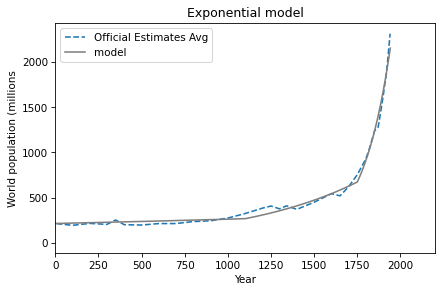

In [27]:
# Create a System object for the exponential growth model
avg_pop=table1.mean(axis=1)
t_0 = 1
t_end = get_last_label(avg_pop)
p_0 = avg_pop[t_0]
p_end = get_last_value(avg_pop)
print(p_0)
print(p_end)
system_exp = System(t_0=t_0, t_end=t_end, p_0=p_0, r1=0.0002, r2=0.00142, r3=0.0061)
print(system_exp)

# Run and plot the exponential Model
results_exp = run_simulation(system_exp, update_func_exp)
plot_results(avg_pop, results_exp, 'Exponential model')



The exponential model fits the data well

How well does your best model predict actual population growth from 1950 to the present?

System(t_0=1, t_end=2024, p_0=215.0, r1=0.0002, r2=0.00142, r3=0.0061)


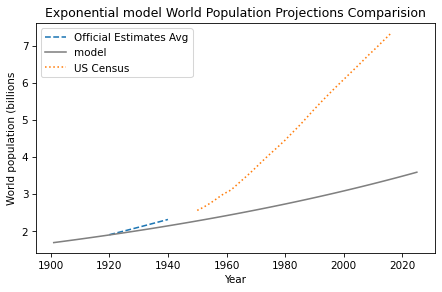

In [28]:
# Generate projections for the exponential growth model
system = System(t_0=t_0, t_end=2024, p_0=p_0, r1=0.0002, r2=0.00142, r3=0.0061)
print(system)
results_prej = run_simulation(system, update_func_exp)
model_billion=results_prej/1e3
avg_pop_b=avg_pop/1e3
projection_plot(avg_pop_b, model_billion, census, 'Exponential model World Population Projections Comparision')

The exponential model using pre-1950 data diverges from the actual US Census estimates post-1950, indicating the need for more data to improve the fit.